In [78]:
from baselines import bench
from baselines.common.vec_env.subproc_vec_env import SubprocVecEnv
from baselines.common.vec_env.dummy_vec_env import DummyVecEnv

from animalai.envs import UnityEnvironment, ArenaConfig
from animalai.envs.gym.environment import AnimalAIEnv

import torch
import gym
import numpy as np
import time

from matplotlib import pyplot as plt
from IPython.display import clear_output
import time

%matplotlib inline

In [82]:
env_path = '../pytorch-a2c-ppo/aai_resources/env/AnimalAI.app'
DEVICE = torch.device('cpu')
BATCH_SIZE = 1

millis = int(time.time())
SEED = millis

print('using seed = ', SEED)


env = AnimalAIEnv(env_path, worker_id=98, n_arenas=BATCH_SIZE, retro=False, seed=SEED)


using seed =  1570987278


INFO:mlagents.envs:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of Training Brains : 1
INFO:gym_unity:1 agents within environment.


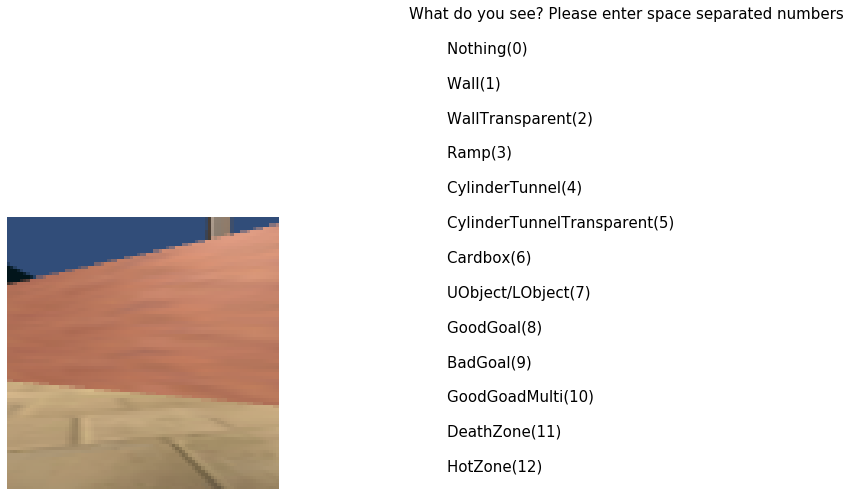

7
your labels [7]


In [93]:
for _ in range(100):
    img, _ = env.reset()
    clear_output()
    
    fig = plt.figure(figsize=(15,5))
    image_ax = fig.add_subplot(121)
    image_ax.axis('off')
    image_ax.imshow(img)

    text_ax = fig.add_subplot(122)
    text_ax.axis('off')
    text_ax.text(0, 0,
        """What do you see? Please enter space separated numbers\n
        Nothing(0)\n
        Wall(1)\n
        WallTransparent(2)\n
        Ramp(3)\n
        CylinderTunnel(4)\n
        CylinderTunnelTransparent(5)\n
        Cardbox(6)\n
        UObject/LObject(7)\n
        GoodGoal(8)\n
        BadGoal(9)\n
        GoodGoadMulti(10)\n
        DeathZone(11)\n
        HotZone(12)\n""",
        size=15
    )

    plt.pause(0.1)
    labels = input()
    labels = np.asarray(labels.split()).astype('int')

    local_time = time.localtime()
    file_name = 'crowdsource_data/sviridov_2/{}_{}_{}'.format(local_time.tm_hour, local_time.tm_min, local_time.tm_sec)

    np.savez(file_name, image=img, labels=labels)

    print('your labels', labels)


In [81]:
env.close()

['GoodGoalMulti', 'ULObject']


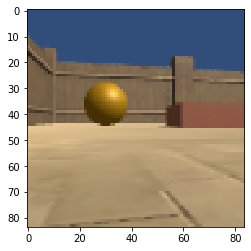

In [42]:
objects = {
    0: 'Nothing',
    1: 'Wall',
    2: 'WallTransparent',
    3: 'Ramp',
    4: 'CylinderTunnel',
    5: 'CylinderTunnelTransprent',
    6: 'Cardbox',
    7: 'ULObject',
    8: 'GoodGoal',
    9: 'BadGoal',
    10: 'GoodGoalMulti',
    11: 'DeathZone',
    12: 'HotZone'
}

res = np.load('./crowdsource_data/21_1_28.npz')
img = list(res.items())[0][1]
lbl = list(res.items())[1][1]
print([objects[id] for id in lbl])


plt.imshow(img)
